import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


upload the db file

In [ ]:

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#**data preperation**

read the file and create data frame

In [ ]:
df=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/all_data_Livnat.xlsx", names=['sample_code', 'diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ','gender','age_at_diagnosis', 'primary_EDSS_at_diagnosis','1_years_EDSS_from_sample_date' , '5_years_from_sample', 'EDSS_post_10_years' ,'oligoclonal_band', 'MRI_lesion_mass', 'treatment_when_sample_was_taken','Lymph_Cells','PMN_Cells','Cells' ])
# remove empty rows
df = df.dropna(how='all')
# Print the first 10 rows of the data set
print(df.head(150))
# Get summary of numerical variables
print(df.describe())

In [ ]:
columns = df.columns
columns

Index(['sample_code', 'diagnosis', 'TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'gender',
       'age_at_diagnosis', 'primary_EDSS_at_diagnosis',
       '1_years_EDSS_from_sample_date', '5_years_from_sample',
       'EDSS_post_10_years', 'oligoclonal_band', 'MRI_lesion_mass',
       'treatment_when_sample_was_taken', 'Lymph_Cells', 'PMN_Cells', 'Cells'],
      dtype='object')

remove white space before and after the word:

In [ ]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

Fix string values to upperCase

In [ ]:
df['gender'] = df['gender'].str.upper()
df['diagnosis'] = df['diagnosis'].str.upper()
df['oligoclonal_band'] = df['oligoclonal_band'].str.upper()
df['treatment_when_sample_was_taken'] = df['treatment_when_sample_was_taken'].str.upper()

global variable for number of rows

In [ ]:
count_row = df.shape[0]
count_row

136

replace 'uk' and 'ND' to 'Nan'

In [ ]:
df = df.replace({'UK': np.nan, 'uk': np.nan, 'ND': np.nan})

In [ ]:
df.to_excel('dfNoUK.xlsx',index=False)

In [ ]:
df.shape

(136, 17)

In [ ]:
#define numeric type diagnosis
df['age_at_diagnosis'] = df['age_at_diagnosis'].astype('int64')
df['primary_EDSS_at_diagnosis'] = df['primary_EDSS_at_diagnosis'].astype('float64')
df['TIGIT_RQ'] = df['TIGIT_RQ'].astype('float64')
df['TIM3_RQ'] = df['TIM3_RQ'].astype('float64')
df['LAG3_RQ'] = df['LAG3_RQ'].astype('float64')
df['1_years_EDSS_from_sample_date'] = df['1_years_EDSS_from_sample_date'].astype('float64')
df['5_years_from_sample'] = df['5_years_from_sample'].astype('float64')
df['EDSS_post_10_years'] = df['EDSS_post_10_years'].astype('float64')
# df['Cells'] = df['Cells'].astype('int64')


#define numeric type MRI
df['MRI_lesion_mass'] = df['MRI_lesion_mass'].astype('float64')

#define category type diagnosis
df['diagnosis'] = df['diagnosis'].astype('category')
df['oligoclonal_band'] = df['oligoclonal_band'].astype('category')
df['sample_code'] = df['sample_code'].astype('category')
df['gender'] = df['gender'].astype('category')
df['treatment_when_sample_was_taken'] = df['treatment_when_sample_was_taken'].astype('category')

In [ ]:
df.dtypes

sample_code                        category
diagnosis                          category
TIM3_RQ                             float64
TIGIT_RQ                            float64
LAG3_RQ                             float64
gender                             category
age_at_diagnosis                      int64
primary_EDSS_at_diagnosis           float64
1_years_EDSS_from_sample_date       float64
5_years_from_sample                 float64
EDSS_post_10_years                  float64
oligoclonal_band                   category
MRI_lesion_mass                     float64
treatment_when_sample_was_taken    category
Lymph_Cells                         float64
PMN_Cells                           float64
Cells                               float64
dtype: object

In [ ]:
mriLessionCol = df['MRI_lesion_mass']
edssTenCol = df['primary_EDSS_at_diagnosis']
edssTenCol = df['1_years_EDSS_from_sample_date']

mriLessionCol = mriLessionCol[np.logical_not(np.isnan(mriLessionCol))]
edssTenCol = edssTenCol[np.logical_not(np.isnan(edssTenCol))]
edssTenCol = edssTenCol[np.logical_not(np.isnan(edssTenCol))]

df['MRI_lesion_mass'].fillna(stats.median(mriLessionCol), inplace=True)
df['primary_EDSS_at_diagnosis'].fillna(stats.median(edssTenCol), inplace=True)
df['1_years_EDSS_from_sample_date'].fillna(stats.median(edssTenCol), inplace=True)


In [ ]:
print(stats.median(df['Lymph_Cells']))

nan


In [ ]:

df['5_years_from_sample'].fillna(stats.median(df['5_years_from_sample']), inplace=True)
df['EDSS_post_10_years'].fillna(stats.median(df['EDSS_post_10_years']), inplace=True)
df['TIM3_RQ'].fillna(stats.median(df['TIM3_RQ']), inplace=True)
df['TIGIT_RQ'].fillna(stats.median(df['TIGIT_RQ']), inplace=True)
df['LAG3_RQ'].fillna(stats.median(df['LAG3_RQ']), inplace=True)
df['oligoclonal_band'].fillna(stats.mode(df['oligoclonal_band']), inplace=True)
df['gender'].fillna(stats.mode(df['gender']), inplace=True)
df['Lymph_Cells'].fillna(np.nanmedian(df['Lymph_Cells']), inplace=True)
df['Lymph_Cells'] = df['Lymph_Cells'].astype('int64')
df['PMN_Cells'].fillna(np.nanmedian(df['PMN_Cells']), inplace=True)
df['PMN_Cells'] = df['PMN_Cells'].astype('int64')
df['Cells'].fillna(np.nanmedian(df['Cells']), inplace=True)
df['Cells'] = df['Cells'].astype('int64')


In [ ]:
df.shape

(136, 17)

In [ ]:
# df = df.loc[df['treatment_when_sample_was_taken'] == 'TREATED']

In [ ]:
df.shape

(136, 17)

In [ ]:
df.to_excel('dfNoUKFillNa.xlsx',index=False)

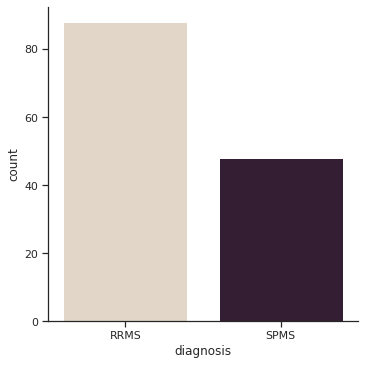

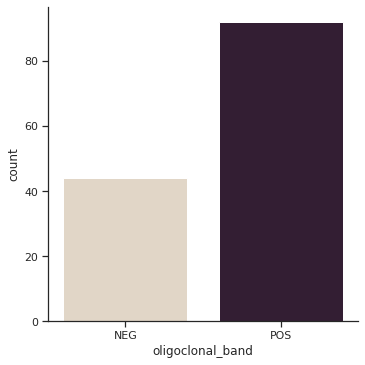

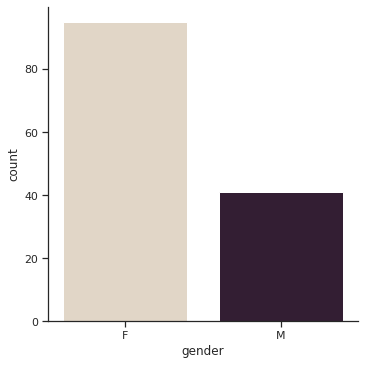

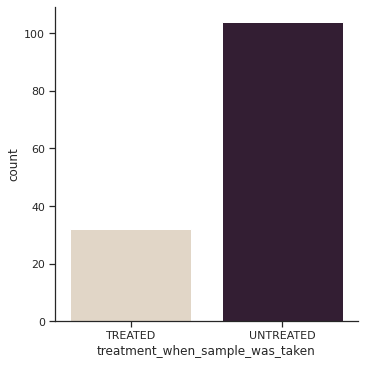

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="diagnosis", kind="count", palette="ch:.25", data=df)
sns.catplot(x="oligoclonal_band", kind="count", palette="ch:.25", data=df)
sns.catplot(x="gender", kind="count", palette="ch:.25", data=df)
sns.catplot(x="treatment_when_sample_was_taken", kind="count", palette="ch:.25", data=df)

find min and max ranges

In [ ]:
print('age_at_diagnosis')
max_value = df['age_at_diagnosis'].max() 
print(max_value)
min_value = df['age_at_diagnosis'].min() 
print(min_value)

print('primary_EDSS_at_diagnosis')
max_value = df['primary_EDSS_at_diagnosis'].max() 
print(max_value)
min_value = df['primary_EDSS_at_diagnosis'].min() 
print(min_value)


print('TIGIT_RQ')
max_value = df['TIGIT_RQ'].max() 
print(max_value)
min_value = df['TIGIT_RQ'].min() 
print(min_value)

print('TIM3_RQ')
max_value = df['TIM3_RQ'].max() 
print(max_value)
min_value = df['TIM3_RQ'].min() 
print(min_value)

print('LAG3_RQ')
max_value = df['LAG3_RQ'].max() 
print(max_value)
min_value = df['LAG3_RQ'].min() 
print(min_value)


print('1_years_EDSS_from_sample_date')
max_value = df['1_years_EDSS_from_sample_date'].max() 
print(max_value)
min_value = df['1_years_EDSS_from_sample_date'].min() 
print(min_value)


print('5_years_from_sample')
max_value = df['5_years_from_sample'].max() 
print(max_value)
min_value = df['5_years_from_sample'].min() 
print(min_value)

print('EDSS_post_10_years')
max_value = df['EDSS_post_10_years'].max() 
print(max_value)
min_value = df['EDSS_post_10_years'].min() 
print(min_value)


print('MRI_lesion_mass')
max_value = df['MRI_lesion_mass'].max() 
print(max_value)
min_value = df['MRI_lesion_mass'].min() 
print(min_value)


age_at_diagnosis
67
16
primary_EDSS_at_diagnosis
5.0
0.0
TIGIT_RQ
2.963221522
0.024232488
TIM3_RQ
4.498309339
0.1453066436
LAG3_RQ
6.850679064
0.01954158185
1_years_EDSS_from_sample_date
5.5
0.0
5_years_from_sample
7.5
0.0
EDSS_post_10_years
10.0
0.0
MRI_lesion_mass
104776.0
0.0


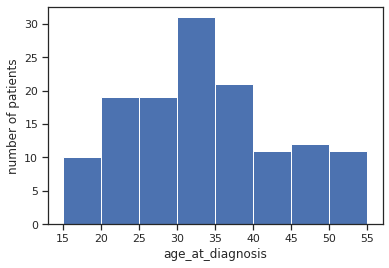

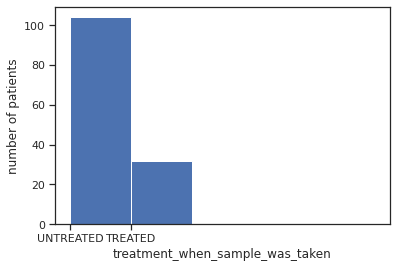

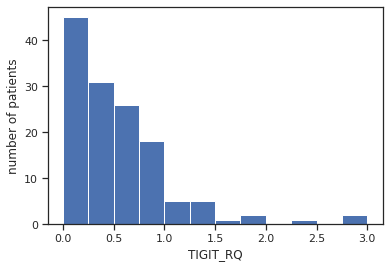

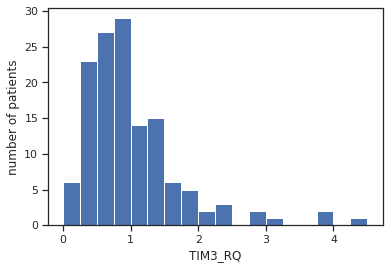

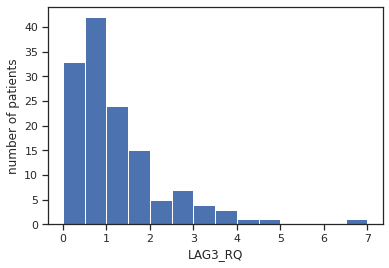

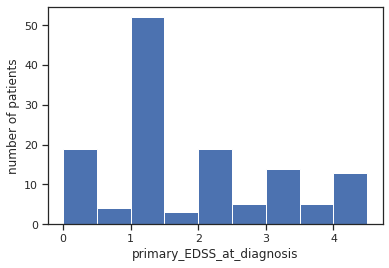

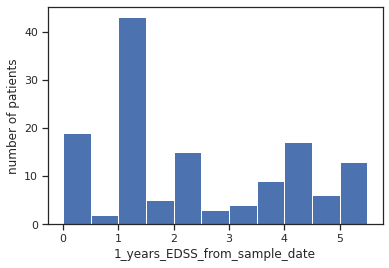

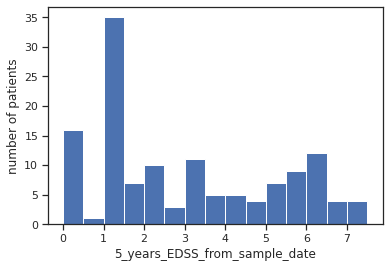

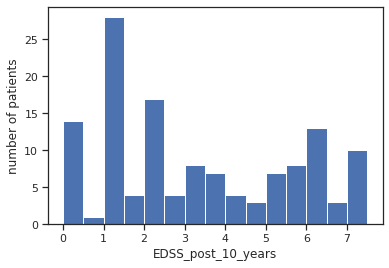

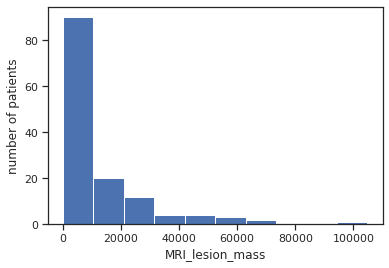

In [ ]:
degrees = df['age_at_diagnosis']
plt.hist(degrees, bins=[15,20,25,30,35,40,45,50,55])
# plt.title('age')
plt.xlabel('age_at_diagnosis')
plt.ylabel('number of patients')
plt.show()

degrees = df['treatment_when_sample_was_taken']
plt.hist(degrees, bins=[0,1,2,3,4,5])
# plt.title('num_of_medicine_changed')
plt.xlabel('treatment_when_sample_was_taken')
plt.ylabel('number of patients')
plt.show()


degrees = df['TIGIT_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
# plt.title('TIGIT_RQ')
plt.xlabel('TIGIT_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = df['TIM3_RQ']
plt.hist(degrees, bins=[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5])
# plt.title('TIM3_RQ')
plt.xlabel('TIM3_RQ')
plt.ylabel('number of patients')
plt.show()


degrees = df['LAG3_RQ']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
# plt.title('LAG3_RQ')
plt.xlabel('LAG3_RQ')
plt.ylabel('number of patients')
plt.show()



degrees = df['primary_EDSS_at_diagnosis']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
# plt.title('primary_EDSS_at_diagnosis')
plt.xlabel('primary_EDSS_at_diagnosis')
plt.ylabel('number of patients')
plt.show()


degrees = df['1_years_EDSS_from_sample_date']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
# plt.title('1_years_EDSS_from_sample_date')
plt.xlabel('1_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()



degrees = df['5_years_from_sample']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('5_years_EDSS_from_sample_date')
plt.xlabel('5_years_EDSS_from_sample_date')
plt.ylabel('number of patients')
plt.show()


degrees = df['EDSS_post_10_years']
plt.hist(degrees, bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
# plt.title('EDSS_post_10_years')
plt.xlabel('EDSS_post_10_years')
plt.ylabel('number of patients')
plt.show()


degrees = df['MRI_lesion_mass']
plt.hist(degrees)
# plt.title('MRI_lesion_mass')
plt.xlabel('MRI_lesion_mass')
plt.ylabel('number of patients')
plt.show()

In [ ]:
df_oligoclonal_band = pd.get_dummies(df['oligoclonal_band'])
df_gender = pd.get_dummies(df['gender'])
df_treatment = pd.get_dummies(df['treatment_when_sample_was_taken'])
df_diagnosis = pd.get_dummies(df['diagnosis'])

df = df.merge(df_oligoclonal_band, left_index=True, right_index=True)
df = df.merge(df_gender, left_index=True, right_index=True)
df = df.merge(df_treatment, left_index=True, right_index=True)
df = df.merge(df_diagnosis, left_index=True, right_index=True)

df = df.rename(columns = {'POS': 'positive_OCB','RRMS' : 'diagnosis_RRMS', 'M': 'Male', 'TREATED' : 'Is_Terated'}, inplace = False)

In [ ]:
df['positive_OCB'] = df['positive_OCB'].astype('category')
df['Male'] = df['Male'].astype('category')
df['diagnosis_RRMS'] = df['diagnosis_RRMS'].astype('category')
df['Is_Terated'] = df['Is_Terated'].astype('category')

In [ ]:
df.shape

(136, 25)

In [ ]:
df.to_excel("Livnat_all.xlsx")

In [ ]:
df.to_pickle('DF_all_treated.pkl')

In [ ]:
categorical_features = ['gender','oligoclonal_band','diagnosis']

In [ ]:
df_all_treated = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/DF_all_treated.pkl")
df_all_treated = pd.get_dummies(df_all_treated, columns=categorical_features, drop_first=True)
df_all_treated.drop(['treatment_when_sample_was_taken'], axis='columns', inplace=True)
df_all_treated
# df_all_treated.to_pickle('/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/df_Livnat_all_patients.pkl')


In [ ]:
df

#**older experiments**

function for calculate cross validation score on one DB

In [ ]:
def calcCrossValidation(model, data, predictors, outcome):

    # Perform k-fold cross-validation with 10 folds
    kf = KFold(n_splits=10)
    accuracy = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        # Record accuracy from each cross-validation run
        
        accuracy.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
  
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy)))
    print(accuracy)

function for calcuate RMSE on one DB only train 

In [ ]:
def calc_rmse(model, data, predictors, outcome):
  df_label = data[outcome]
  df_predictors = data[predictors]
  X_train, X_test, y_train, y_test = train_test_split(df_predictors, df_label)
  # Fit the model on training set:
  model.fit(X_train,  y_train)
  # Make predictions on training set:
  y_predicted = model.predict(X_test)
  rmse = sqrt(mean_squared_error(y_test, y_predicted))  
  print(rmse)

function for calculate RMSE on Two databases. train on one and test on the other

In [ ]:
def calcRmseTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on training set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    rmse = sqrt(mean_squared_error(dataTest[outcome], predictions))  
    print(rmse)

In [ ]:
def calc_specificity(model, test_set, predicted):
  specificity = tn / (tn +fp)


calculate accuracy just on train one DB

In [ ]:
def calcAccuracy(model, data, predictors, outcome):
    # Fit the model:
    model.fit(data[predictors], data[outcome])
    # Make predictions on training set:
    predictions = model.predict(data[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

calculate Accuracy Two databases train on one and test on the other

In [ ]:
def calcAccuracyTwoDF(model, dataTrain, dataTest, predictors, outcome):

    # Fit the model:
    model.fit(dataTrain[predictors], dataTrain[outcome])
    # Make predictions on testing set:
    predictions = model.predict(dataTest[predictors])
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, dataTest[outcome])
    print("Training accuracy : %s" % "{0:.3%}".format(accuracy))

In [ ]:
df.to_excel('dfcheck.xlsx',index=False)

In [ ]:
df.dtypes

sample_code                        category
diagnosis                          category
TIM3_RQ                             float64
TIGIT_RQ                            float64
LAG3_RQ                             float64
gender                             category
age_at_diagnosis                      int64
primary_EDSS_at_diagnosis           float64
1_years_EDSS_from_sample_date       float64
5_years_from_sample                 float64
EDSS_post_10_years                  float64
oligoclonal_band                   category
MRI_lesion_mass                     float64
treatment_when_sample_was_taken    category
Lymph_Cells                           int64
PMN_Cells                             int64
Cells                                 int64
NEG                                   uint8
positive_OCB                       category
F                                     uint8
Male                               category
Is_Terated                         category
UNTREATED                       

In [ ]:
# check RMSE mergesDB - target EDSS - Random Forest Algorithm
rf1 = RandomForestRegressor(n_estimators = 10, random_state = 42)
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'EDSS_post_10_years'
calc_rmse(rf1, df, predictor_var1, outcome_var1)

2.436479801584534


In [ ]:
# check accuracy second DB target diagnosis_RRMS - Random Forest Algorithm
rf2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var1 = 'diagnosis_RRMS'
calcAccuracy(rf2, df, predictor_var1, outcome_var1)

Training accuracy : 86.765%


In [ ]:
# check Cross Validation Score - Random Forest Algorithm
rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# Train the model on training data
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcCrossValidation(rf3, df, predictor_var1, outcome_var)

Cross-Validation Score : 77.747%
[1.0, 0.7857142857142857, 0.5, 0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.7692307692307693, 0.6923076923076923, 0.46153846153846156, 0.9230769230769231]


calculate RMSE target EDSS train on one DB and test on the other

In [ ]:
# rf4 = RandomForestRegressor(n_estimators = 10, random_state = 42)
# predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var1 = 'EDSS_post_10_years'
# calcRmseTwoDF(rf4, dfSecondDB, dfFirstDB, predictor_var1, outcome_var1)

calculate RMSE target EDSS train on one DB and test on the other

In [ ]:
# rf5 = RandomForestRegressor(n_estimators = 10, random_state = 42)
# predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var1 = 'EDSS_post_10_years'
# calcRmseTwoDF(rf5, dfFirstDB, dfSecondDB, predictor_var1, outcome_var1)

using logistic regression model - prediction, p-value, feature importance

calc accuracy each df

In [ ]:
logisticRegrDF = LogisticRegression()
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(logisticRegrDF, df, predictor_var1, outcome_var)

Training accuracy : 77.941%


calc accuracy both df merged

In [ ]:
# logisticRegrDFMerged = LogisticRegression(max_iter = 2000)
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'
# calcAccuracyTwoDF(logisticRegrDFMerged, dfFirstDB, dfSecondDB, predictor_var, outcome_var)

In [ ]:
# rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'
# calcAccuracyTwoDF(rf3, dfFirstDB, dfSecondDB, predictor_var, outcome_var)

In [ ]:
# logisticRegrDFMerged = LogisticRegression(max_iter = 2000)
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'
# calcAccuracyTwoDF(logisticRegrDFMerged, dfSecondDB, dfFirstDB, predictor_var, outcome_var)



In [ ]:
# rf3 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'
# calcAccuracyTwoDF(rf3, dfSecondDB, dfFirstDB, predictor_var, outcome_var)

Calculate feature importances

In [ ]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['primary_EDSS_at_diagnosis', 'MRI_lesion_mass', 'age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
rf.fit(df[predictor_var], df[outcome_var])
importances = rf.feature_importances_
importances

array([0.38447912, 0.12422614, 0.12399779, 0.16795648, 0.04915879,
       0.09392625, 0.03965936, 0.01659606])

In [ ]:
df.to_excel('dfcheck.xlsx',index=False)

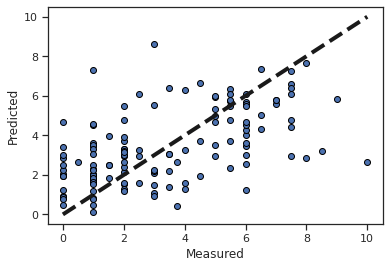

In [ ]:

from sklearn import linear_model

rf = RandomForestRegressor(n_estimators = 10, random_state = 42)





from sklearn import datasets

# boston = datasets.load_boston()
# print(boston)
# print(outcome_var)
predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'EDSS_post_10_years'
y = df[outcome_var]




# df[outcome_var]

from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(rf, df[predictor_var], y, cv=10)


fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# print(__doc__)

# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_confusion_matrix

# model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
# predictor_var = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'PD-1_RQ', 'Male', 'positive_OCB']
# outcome_var = 'diagnosis_RRMS'

# # Fit the model:
# model.fit(dfMerged[predictor_var], dfMerged[outcome_var])
# # Make predictions on training set:
# predictions = model.predict(dfMerged[predictor_var])
# # Print accuracy

# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(model, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()


# # X = dfMerged[predictor_var]
# # y = dfMerged[outcome_var]
# class_names = ['SPMS', 'RRMS']

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # # Run classifier, using a model that is too regularized (C too low) to see
# # # the impact on the results
# # classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# titles_options = [("Confusion matrix, without normalization", None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(classifier, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [ ]:
df.to_csv('df_all_patients_weka_all.csv',index=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features='auto')
predictor_var = ['primary_EDSS_at_diagnosis', 'MRI_lesion_mass', 'age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
rf.fit(df[predictor_var], df[outcome_var])
importances = rf.feature_importances_
importances

array([0.3635043 , 0.08972285, 0.11088333, 0.18049229, 0.10906431,
       0.11037719, 0.01201166, 0.02394407])

In [ ]:
logisticRegrDF = LogisticRegression()
predictor_var1 = ['MRI_lesion_mass', 'primary_EDSS_at_diagnosis','age_at_diagnosis','TIM3_RQ', 'TIGIT_RQ', 'LAG3_RQ', 'Male', 'positive_OCB']
outcome_var = 'diagnosis_RRMS'
calcAccuracy(logisticRegrDF, df, predictor_var1, outcome_var)

Training accuracy : 77.941%
